In [35]:
import pandas as pd
import numpy as np
import napari
from napari_layer_table import LayerTablePlugin

In [36]:
viewer = napari.Viewer()

### creating a points layer

In [37]:
points_layer = viewer.add_points(
                    data=np.array([[0, 10, 10], [0, 20, 20], [0, 30, 30], [0, 40, 40]]),
                    ndim=3,
                    name = 'my points layer',
                    size=3, 
                    face_color='red', 
                    shown = True,
                    features={'f1': 'a', 'f2': 2})

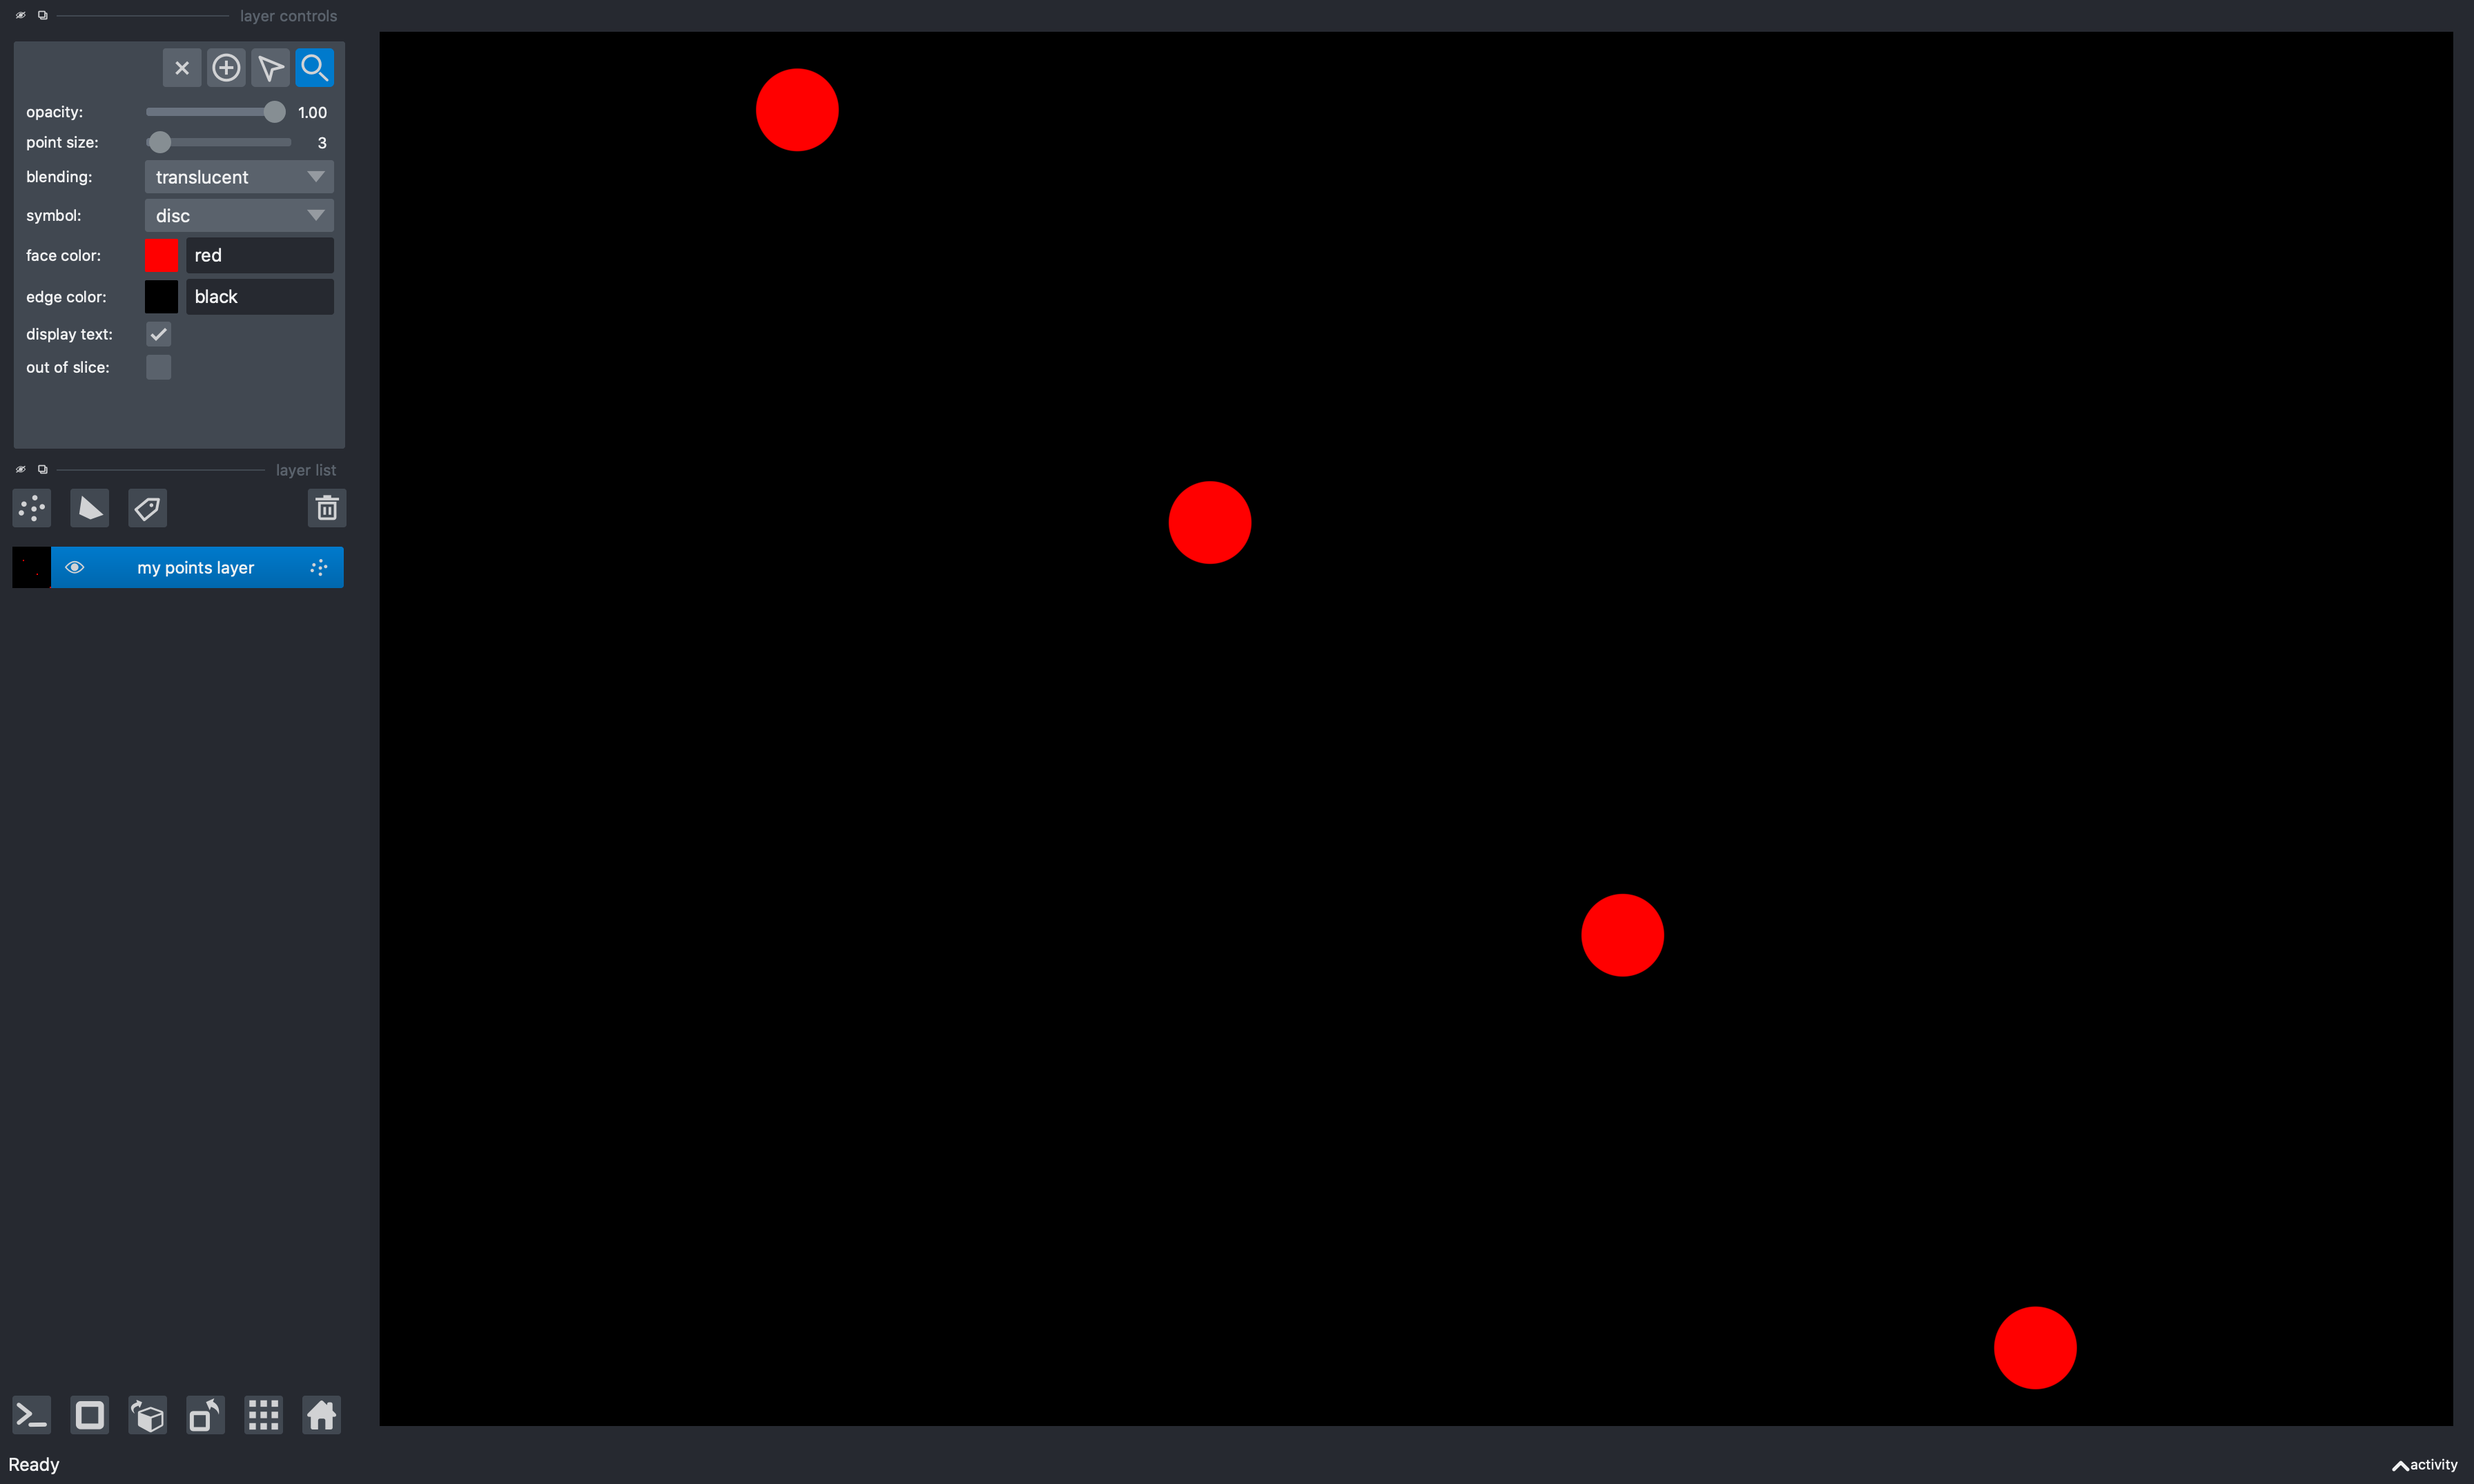

In [38]:
napari.utils.nbscreenshot(viewer)

### initializing the layer table plugin and position it in the napari viewer

In [39]:
plugin = LayerTablePlugin(viewer, oneLayer=points_layer)

   INFO - _my_layer.py newOnShiftClick() line:254 -- disabling newOnShiftClick
   INFO - _my_widget.py _refreshTableData() line:367 -- Full refresh ... limit use of this


In [40]:
viewer.window.add_dock_widget(plugin, area='right', name=points_layer.name)

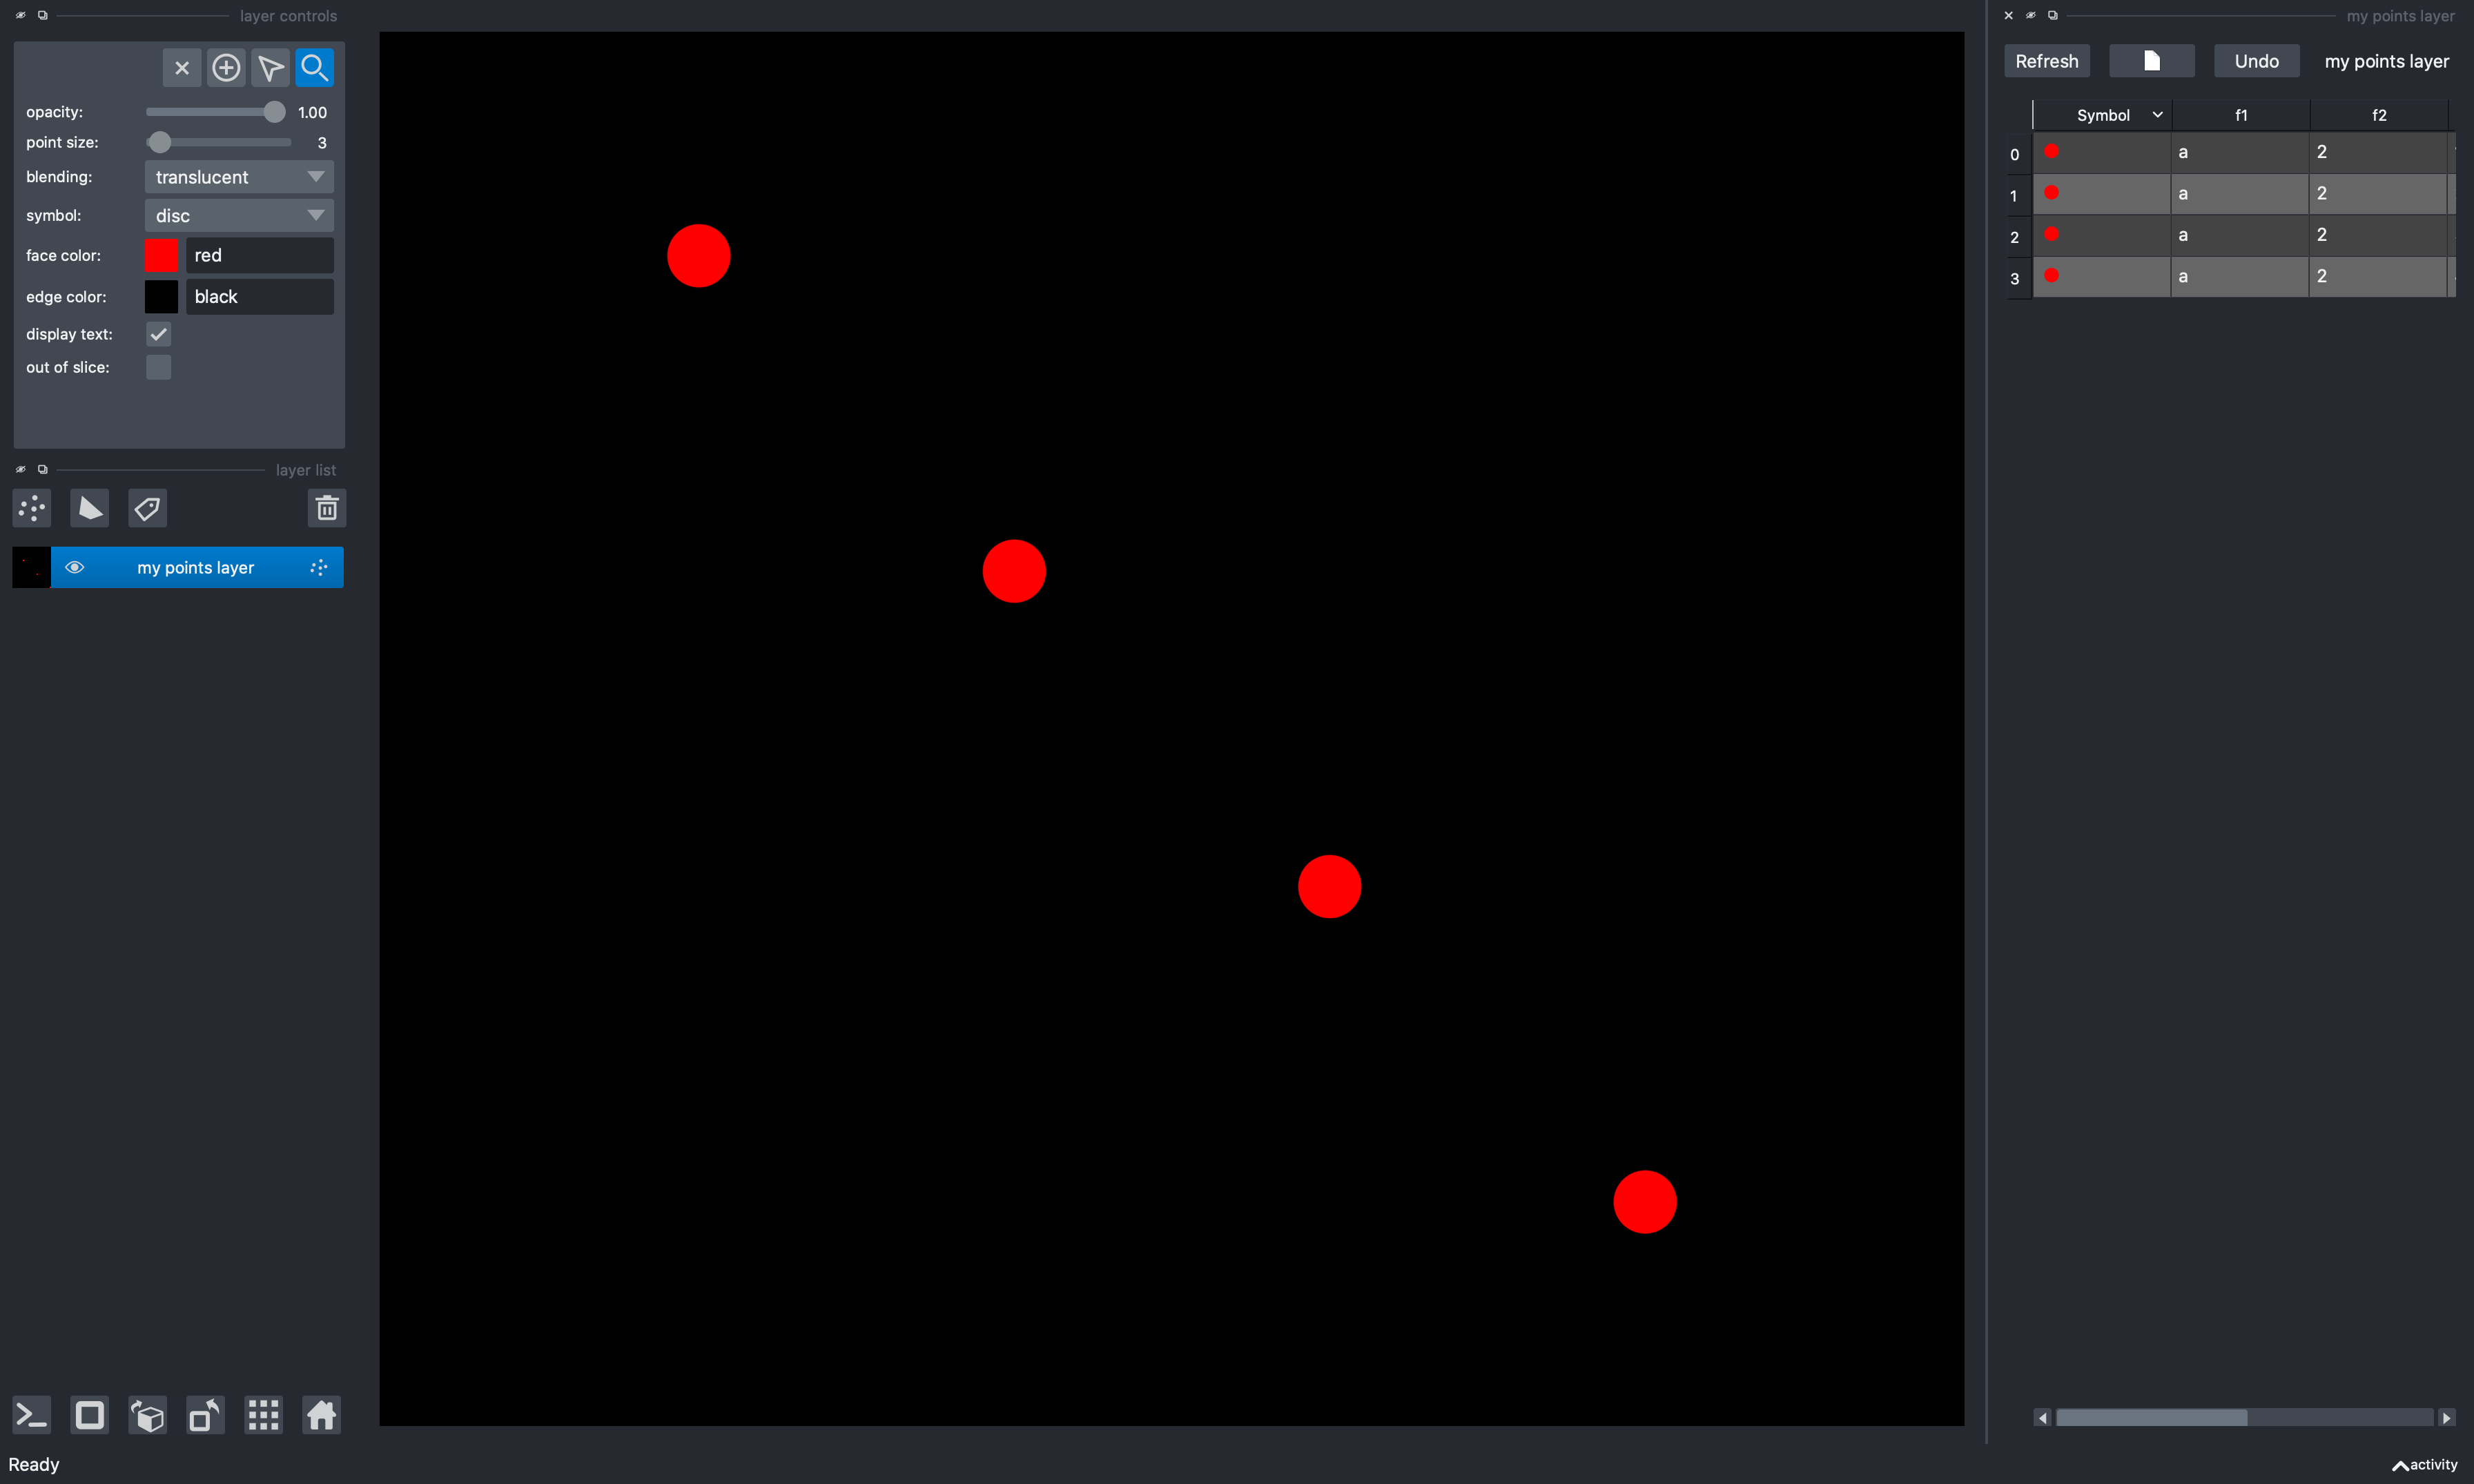

In [41]:
napari.utils.nbscreenshot(viewer)

### copy points layer data to clipboard

In [42]:
plugin.copyToClipboard()

   INFO - _data_model.py myCopyTable() line:205 -- Copied table to clipboard with shape: (4, 7)
  Symbol f1  f2   x   y  z Face Color
0      ⚫  a   2  10  10  0  #ff0000ff
1      ⚫  a   2  20  20  0  #ff0000ff
2      ⚫  a   2  30  30  0  #ff0000ff
3      ⚫  a   2  40  40  0  #ff0000ff


### creating a shapes layer

In [43]:
# create a list of polygons
polygons = [
    np.array([[10, 30], [11, 13], [22, 24]]),
    np.array([[50, 6],[40, 7],[38, 4]]),
    np.array([[31, 38],[22, 38],[20, 40]]),
]

# create features
features = {
    'likelihood': [0.2, 0.5, 1],
    'class': ['sky', 'person', 'building'],
}

# add polygons
shapes_layer = viewer.add_shapes(
    polygons,
    features=features,
    shape_type='polygon',
    edge_width=1,
    edge_color='likelihood',
    edge_colormap='gray',
    face_color='class',
    face_color_cycle=['blue', 'magenta', 'green'],
    name='shapes',
)

### initializing the layer table plugin and position it in the napari viewer

In [44]:
plugin = LayerTablePlugin(viewer, oneLayer=shapes_layer)
viewer.window.add_dock_widget(plugin, area='right', name=shapes_layer.name)

   INFO - _my_layer.py newOnShiftClick() line:254 -- disabling newOnShiftClick
   INFO - _my_layer.py _updateFeatures() line:1015 -- shapesLayer selectedList:[0, 1, 2]
   now self._layer.features:
   likelihood     class          x          y     z
0         0.2       sky  22.333333  14.333333  None
1         0.5    person   5.666667  42.666667  None
2         1.0  building  38.666667  24.333333  None
   INFO - _my_widget.py _refreshTableData() line:367 -- Full refresh ... limit use of this


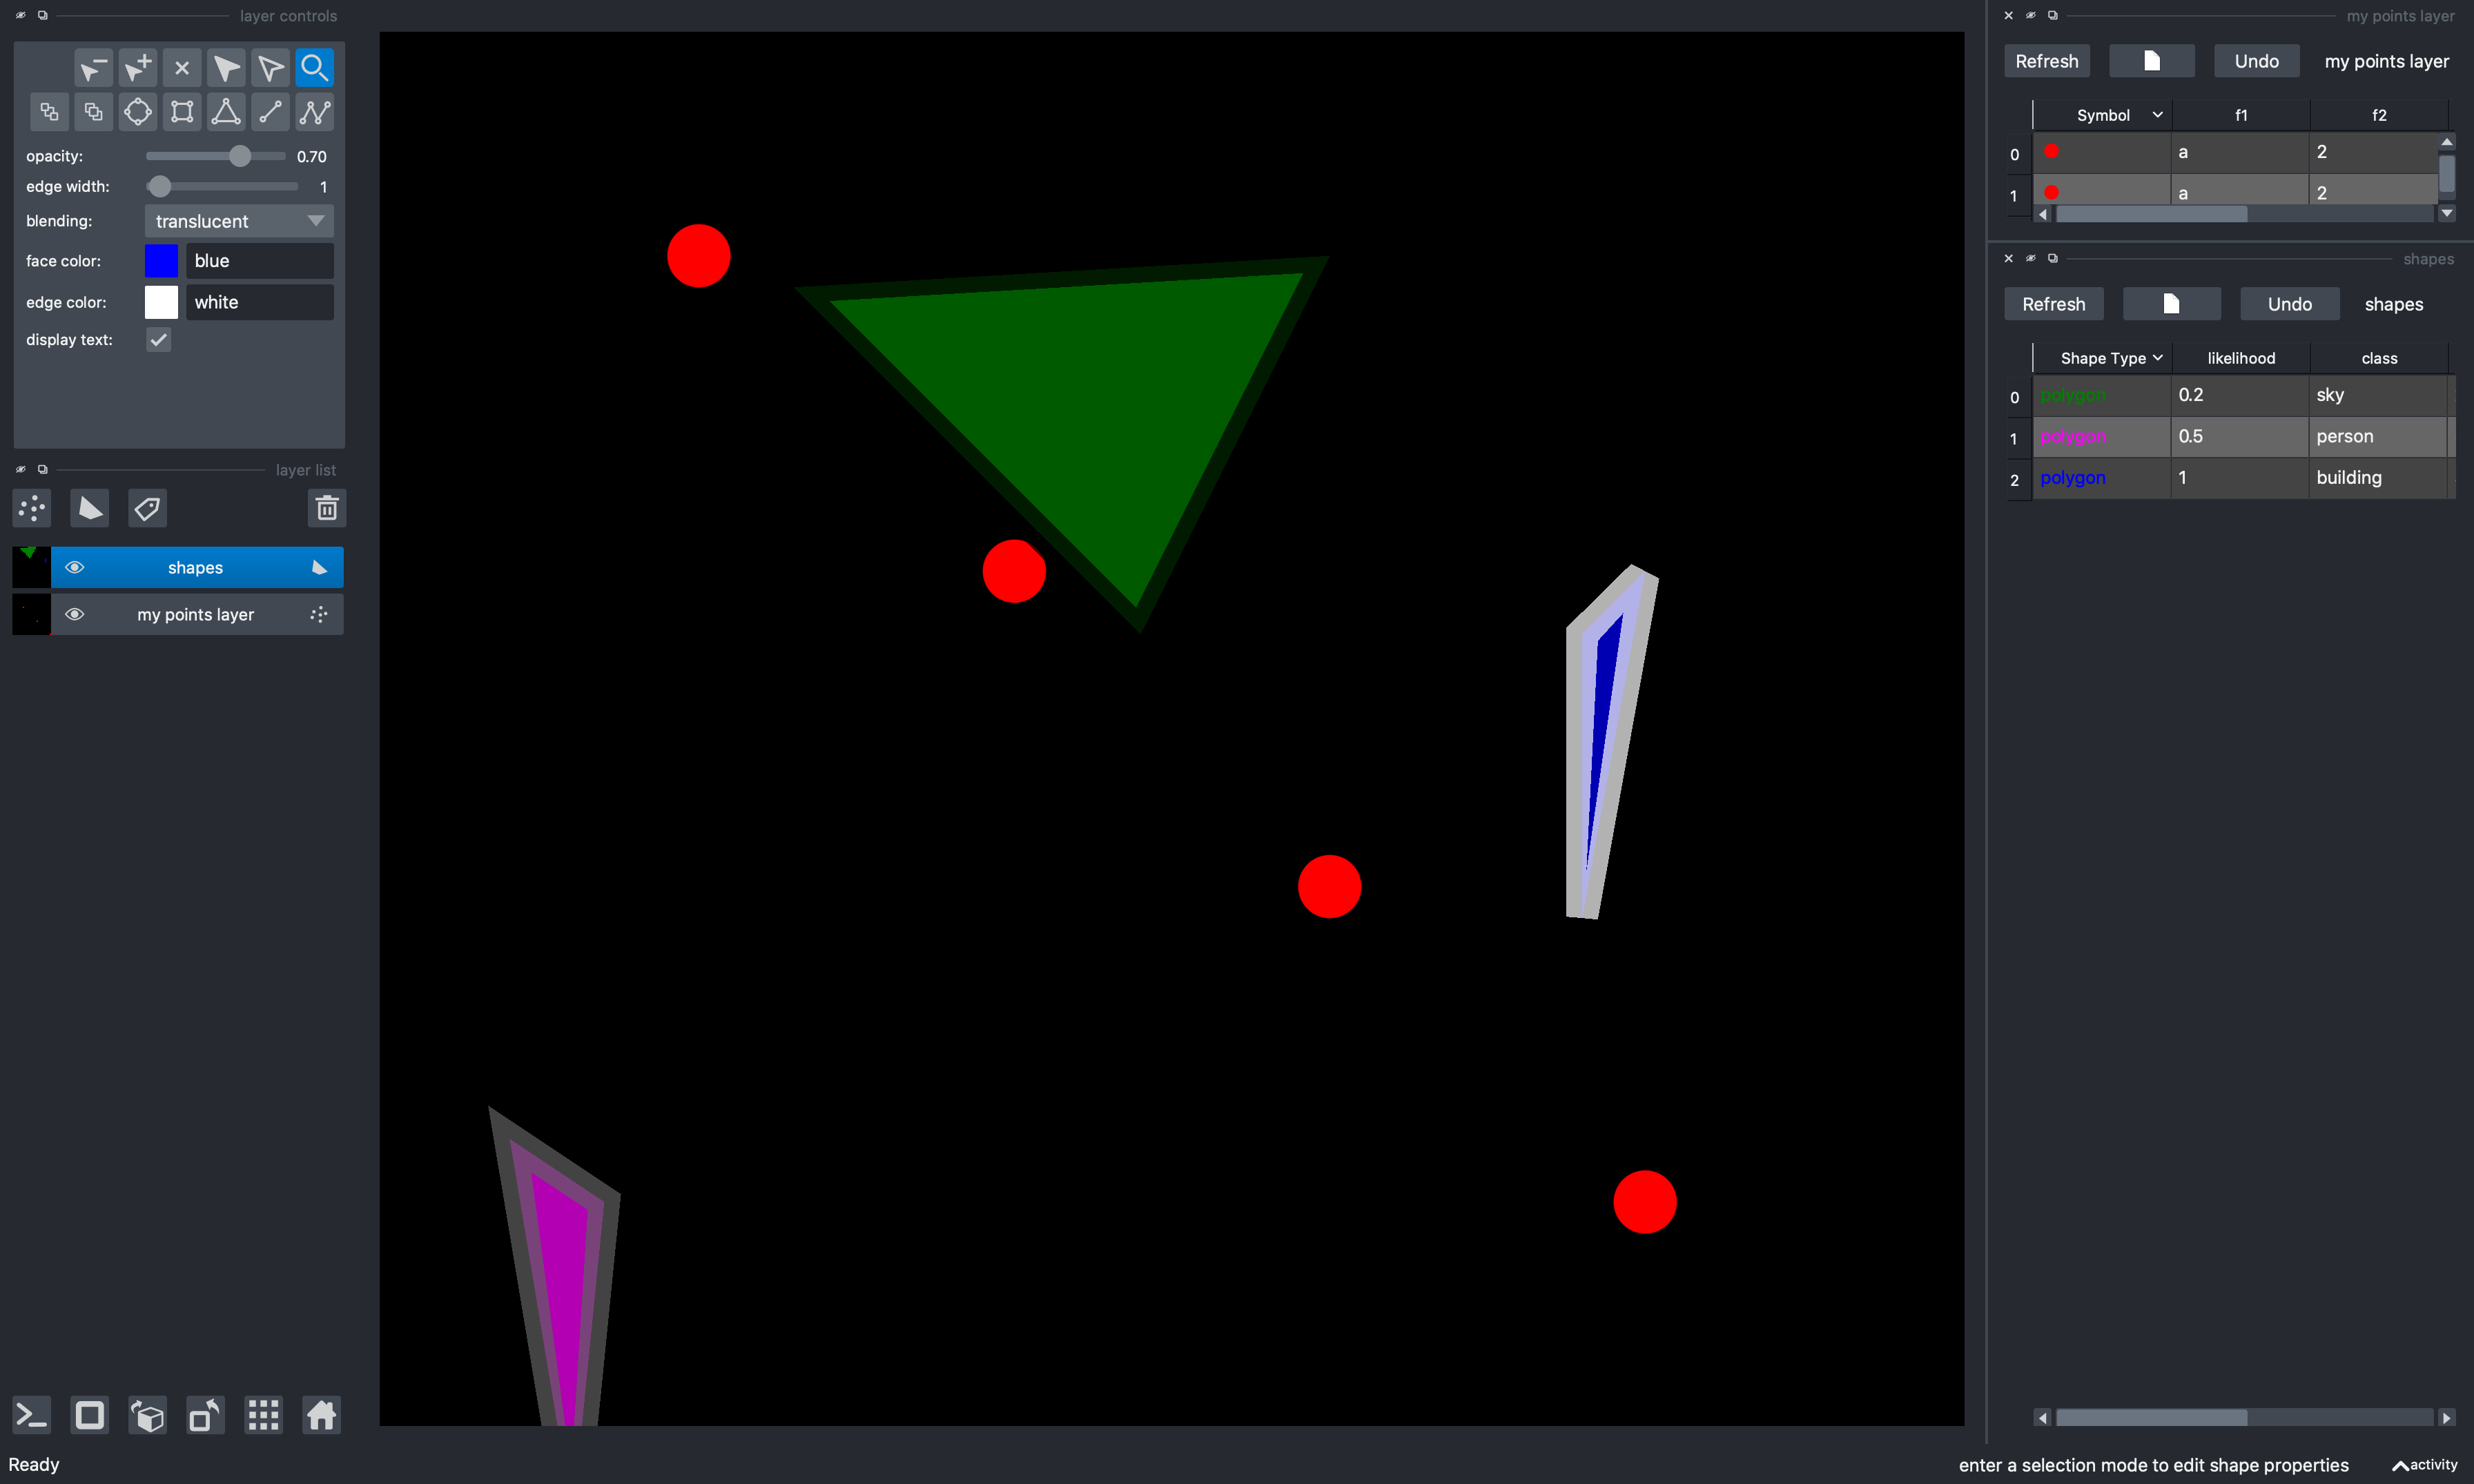

In [45]:
napari.utils.nbscreenshot(viewer)

### copy shapes layer data to clipboard

In [46]:
plugin.copyToClipboard()

   INFO - _data_model.py myCopyTable() line:205 -- Copied table to clipboard with shape: (3, 7)
  Shape Type  likelihood     class          x          y     z Face Color
0    polygon         0.2       sky  22.333333  14.333333  None  #008000ff
1    polygon         0.5    person   5.666667  42.666667  None  #ff00ffff
2    polygon         1.0  building  38.666667  24.333333  None  #0000ffff
